In [1]:
from pandas.io.gbq import read_gbq

In [2]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.mit_streetscore` LIMIT 10"

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/v2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&access_type=offline

If your browser is on a different machine then exit and re-run this
application with the command-line parameter

  --noauth_local_webserver

Authentication successful.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 10 rows.

Total time taken 1.21 s.
Finished at 2017-03-25 12:58:11.


/usr/local/lib/python2.7/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access bigquery_credentials.dat: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))


In [5]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `bigquery-public-data.new_york.tlc_yellow_trips_2016` LIMIT 10"

df = read_gbq(query=sample_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Processed: 8.9 Gb

Retrieving results...
Got 10 rows.

Total time taken 3.31 s.
Finished at 2017-03-25 11:21:23.


In [6]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount
0,1,2016-06-05 04:51:16,2016-06-05 05:14:02,1,10.5,-73.997444,40.716759,1,N,-73.864502,40.757748,2,31.0,0.5,0.5,0.00,0,0.3,32.30
1,1,2016-03-13 19:26:50,2016-03-13 19:47:27,1,3.2,-73.997116,40.742077,1,N,-74.014053,40.708397,2,15.0,0.0,0.5,0.00,0,0.3,15.80
2,1,2016-04-11 12:14:41,2016-04-11 12:17:55,1,0.3,-73.955269,40.779583,1,N,-73.956703,40.782513,2,4.0,0.0,0.5,0.00,0,0.3,4.80
3,1,2016-01-19 20:05:37,2016-01-19 20:11:21,1,1.1,-73.955162,40.777180,1,N,-73.970436,40.785828,1,6.0,0.5,0.5,1.00,0,0.3,8.30
4,1,2016-04-27 20:16:15,2016-04-27 20:20:32,1,0.8,-73.925613,40.759056,1,N,-73.913902,40.761189,1,5.0,0.5,0.5,1.25,0,0.3,7.55


In [34]:

from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.NYC_MTA_stations` LIMIT 10"

dfstations = read_gbq(query=sample_query, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 10 rows.

Total time taken 0.91 s.
Finished at 2017-03-25 11:33:06.


In [12]:
dfstations.head(20)

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Entrance_Latitude,Entrance_Longitude,Station_Location,Entrance_Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,None,None,None,None,...,False,None,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,None,None,None,None,...,False,None,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.998220)"
2,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NE,40.649265,-74.009457,"(40.648939, -74.010006)","(40.649265, -74.009457)"
3,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NE,40.649389,-74.009333,"(40.648939, -74.010006)","(40.649389, -74.009333)"
4,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NW,40.649546,-74.009602,"(40.648939, -74.010006)","(40.649546, -74.009602)"
5,BMT,4 Avenue,45th St,40.648939,-74.010006,R,None,None,None,None,...,False,None,True,4th Ave,45th St,NW,40.649424,-74.009728,"(40.648939, -74.010006)","(40.649424, -74.009728)"
6,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,None,None,None,None,...,False,None,True,4th Ave,53rd St,SW,40.644653,-74.014690,"(40.645069, -74.014034)","(40.644653, -74.014690)"
7,BMT,4 Avenue,53rd St,40.645069,-74.014034,R,None,None,None,None,...,False,None,True,4th Ave,53rd St,SE,40.644493,-74.014419,"(40.645069, -74.014034)","(40.644493, -74.014419)"
8,IND,Rockaway,Broad Channel,40.608382,-73.815925,A,H,None,None,None,...,False,None,True,West Rd,Noel Rd,NE,40.608007,-73.815967,"(40.608382, -73.815925)","(40.608007, -73.815967)"
9,BMT,Franklin,Franklin Av,40.680596,-73.955827,A,FS,None,None,None,...,True,None,True,Franklin Ave,Fulton St,SW,40.681051,-73.955840,"(40.680596, -73.955827)","(40.681051, -73.955840)"


In [4]:
project = "spheric-crow-161317"
studio = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio` "
onebr   = "SELECT * FROM    `smart_cities_data.median_rents_zipcode_1br`"
twobr = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"

dfstudio = read_gbq(query=studio, project_id=project, dialect='standard')
dfonebr = read_gbq(query=onebr, project_id=project, dialect='standard')
dftwobr = read_gbq(query=twobr, project_id=project, dialect='standard')


Requesting query... ok.
Query running...
Query done.
Processed: 43.7 kb

Retrieving results...
Got 87 rows.

Total time taken 2.41 s.
Finished at 2017-03-25 13:03:29.
Requesting query... ok.
Query running...
Query done.
Processed: 198.2 kb

Retrieving results...
Got 424 rows.

Total time taken 3.36 s.
Finished at 2017-03-25 13:03:36.
Requesting query... ok.
Query running...
Query done.
Processed: 295.1 kb

Retrieving results...
Got 619 rows.

Total time taken 2.98 s.
Finished at 2017-03-25 13:03:39.


In [29]:
dfstudio.head()

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01
0,92101,San Diego,CA,San Diego,San Diego,37,NaN,NaN,NaN,NaN,...,1735.0,1755,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0
1,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,NaN,...,1150.0,1145,1150.0,1125.0,1095.0,1095.0,1095.0,1095.0,1150.0,1170.0
2,90005,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,54,NaN,NaN,NaN,NaN,...,1235.0,1185,1195.0,1200.0,1295.0,1272.5,1262.5,1350.0,1325.0,1325.0
3,60625,Chicago,IL,Chicago,Cook,20,NaN,NaN,NaN,NaN,...,995.0,950,950.0,995.0,950.0,895.0,875.0,850.0,875.0,950.0
4,11221,New York,NY,New York,Kings,28,NaN,NaN,NaN,NaN,...,1630.0,1630,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0


In [6]:
parks =  gpd.GeoDataFrame.from_file("NYC_shapefiles/Parks Properties.geojson")

In [7]:
parks.head()


,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,(POLYGON ((-73.94806058617907 40.7558921243117...,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((-73.78243845176827 40.8440889832096...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((-73.83638471337602 40.5780595390407...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((-73.87623969625949 40.8419878695552...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,(POLYGON ((-73.93623823248316 40.7692821829763...,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


In [20]:
parks.geometry

0       (POLYGON ((-73.94806058617907 40.7558921243117...
1       (POLYGON ((-73.78243845176827 40.8440889832096...
2       (POLYGON ((-73.83638471337602 40.5780595390407...
3       (POLYGON ((-73.87623969625949 40.8419878695552...
4       (POLYGON ((-73.93623823248316 40.7692821829763...
5       (POLYGON ((-74.00658983661403 40.5819294678948...
6       (POLYGON ((-73.96140516032709 40.7303200456246...
7       (POLYGON ((-73.99727044739234 40.5777662003565...
8       (POLYGON ((-74.00342102840533 40.6717911236283...
9       (POLYGON ((-73.93611806830104 40.7889422334689...
10      (POLYGON ((-74.13645632629526 40.6408531912317...
11      (POLYGON ((-74.07175700344436 40.5755440109399...
12      (POLYGON ((-73.77721708253227 40.6109609432279...
13      (POLYGON ((-74.19809191879783 40.5153854832136...
14      (POLYGON ((-74.06244078908416 40.6177572041391...
15      (POLYGON ((-74.10086903940999 40.6446864633586...
16      (POLYGON ((-73.98881972964085 40.5830074460045...
17      (POLYG

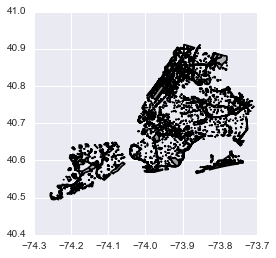

In [35]:
parks.plot()

In [8]:
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

In [36]:
park_proj.area

0       9.035791e+05
1       2.638313e+05
2       6.547116e+03
3       2.023259e+04
4       1.997002e+05
5       3.774028e+05
6       2.806778e+05
7       1.129923e+06
8       2.010920e+06
9       1.809886e+04
10      1.890365e+05
11      2.806791e+07
12      1.228138e+07
13      4.554019e+06
14      6.762281e+05
15      3.670882e+06
16      1.545136e+06
17      4.160617e+05
18      6.084300e+05
19      5.340121e+04
20      1.282808e+05
21      7.207006e+04
22      3.554482e+06
23      2.905180e+06
24      4.360490e+05
25      3.837820e+05
26      7.230112e+04
27      7.246140e+05
28      2.804825e+05
29      2.305022e+06
            ...     
1978    5.486643e+03
1979    5.161283e+03
1980    2.761493e+03
1981    2.367886e+03
1982    2.491417e+03
1983    5.938818e+03
1984    1.900799e+03
1985    4.547827e+03
1986    5.712078e+03
1987    3.906373e+03
1988    2.156685e+03
1989    3.959623e+03
1990    6.126203e+03
1991    5.097366e+03
1992    3.101674e+03
1993    5.539169e+03
1994    5.741

In [25]:
from geopy.distance import vincenty

In [9]:
zipcodes = gpd.GeoDataFrame.from_file("NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

## filter the zillow data for new york city  and add apartment type

In [10]:
dfstudio['apt_kind'] = 0
dfonebr['apt_kind'] = 1
dftwobr['apt_kind'] = 2

## combine all the data then filter for nyc

In [12]:
dfstudio.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2011_01,_2011_02,_2011_03,_2011_04,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,20009,Washington,DC,Washington,District of Columbia,19,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0


In [13]:
dfonebr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_04,_2010_05,_2010_06,_2010_07,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60601,Chicago,IL,Chicago,Cook,348,NaN,NaN,NaN,NaN,...,2093.0,2120.0,2156.0,2185.0,2085.0,2011.0,2017.5,1975.0,2000.0,1


In [14]:
dftwobr.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,60605,Chicago,IL,Chicago,Cook,383,NaN,NaN,NaN,NaN,...,2581.0,2570.0,2535.0,2600.0,2529.0,2500.0,2558.0,2600.0,2500.0,2


In [15]:
alldata = pd.concat([dfstudio, dfonebr, dftwobr])

In [16]:
alldata.head(2)

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
0,Washington,District of Columbia,Washington,20009,19,DC,NaN,NaN,NaN,NaN,...,1699.0,1760.0,1737.5,1850.0,1750.0,1735.0,1750.0,1762.5,1752.5,0
1,San Diego,San Diego,San Diego,92101,37,CA,NaN,NaN,NaN,NaN,...,1755.0,1770.0,1768.0,1754.0,1812.5,1767.5,1730.0,1770.0,1835.0,0


In [18]:
zipcodes.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


## can we overlay zipcodes and parks and look at park area per zipcode

In [19]:
alldata.City.unique()

array([u'Washington', u'San Diego', u'Chicago', u'Seattle', u'New York',
       u'Saint Louis', u'Cambridge', u'Los Angeles', u'Austin',
       u'San Francisco', u'Denver', u'Arlington', u'Miami', u'Boston',
       u'Brookline', u'Philadelphia', u'Miami Beach', u'Atlanta',
       u'Union City', u'Houston', u'North Bethesda', u'Dallas', u'Orlando',
       u'Silver Spring', u'San Antonio', u'Jersey City', u'Newton',
       u'Plano', u'Fairfax', u'Grapevine', u'Irving', u'Hoboken',
       u'Richmond', u'Honolulu', u'Alexandria', u'Miramar', u'North Miami',
       u'Cedar Park', u'Waltham', u'Minneapolis', u'Woburn',
       u'Laguna Beach', u'Greenwood Village', u'Redmond', u'Kirkland',
       u'Mc Lean', u'Pflugerville', u'Providence', u'Charlotte',
       u'Sunnyvale', u'Foster City', u'La Mesa', u'Bloomington',
       u'Bethesda', u'Sandy Springs', u'Phoenix', u'Portland', u'Evanston',
       u'Fremont', u'San Jose', u'Omaha', u'Century Village',
       u'Newport News', u'Boulder', u'Ta

In [20]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


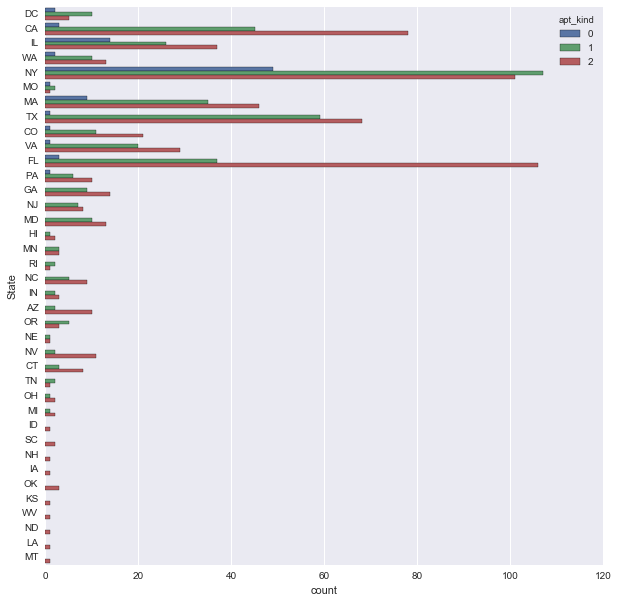

In [28]:
# look at count of apt type by state
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.countplot(y="State", hue="apt_kind", data=alldata)


In [29]:
dfny = alldata[alldata['State']=='NY']

In [30]:
dfny.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,apt_kind
4,New York,Bronx,New York,10458,25,NY,NaN,NaN,NaN,NaN,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,0
9,New York,Kings,New York,11205,56,NY,NaN,NaN,NaN,NaN,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,0
12,New York,Kings,New York,11221,28,NY,NaN,NaN,NaN,NaN,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,0
16,New York,Queens,New York,11102,64,NY,NaN,NaN,NaN,NaN,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,0
18,New York,New York,New York,10038,76,NY,NaN,NaN,NaN,NaN,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,0


In [31]:
zipcodes.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

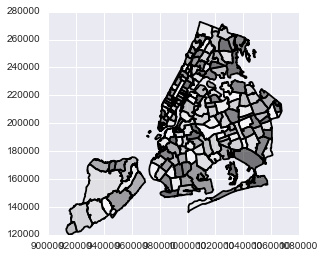

In [36]:
zipcodes.plot()

In [ ]:
zipcodesproj = park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs